# Initialize

## Load Libraries

In [1]:
import matplotlib
import random
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
data  = np.transpose(np.loadtxt('g-Factor.txt', skiprows=1, delimiter = ','))

# This is to skip the last few points of the data set
padding = -100
t = data[0,:padding]
gx = data[1,:padding]
gy = data[2,:padding]
gz = data[3,:padding]

# Expected value for g
Eidgenössisches Institut für Metrologie METAS:
https://www.metas.ch/metas/de/home/dok/gravitationszonen.html

In [3]:
g_theo = 9.806 # N/kg

# Main

In [4]:
# Get size of data set
n = gz.shape[0]

print('Number of data points : {:d}'.format(n))

Number of data points : 13394


## Plot Data

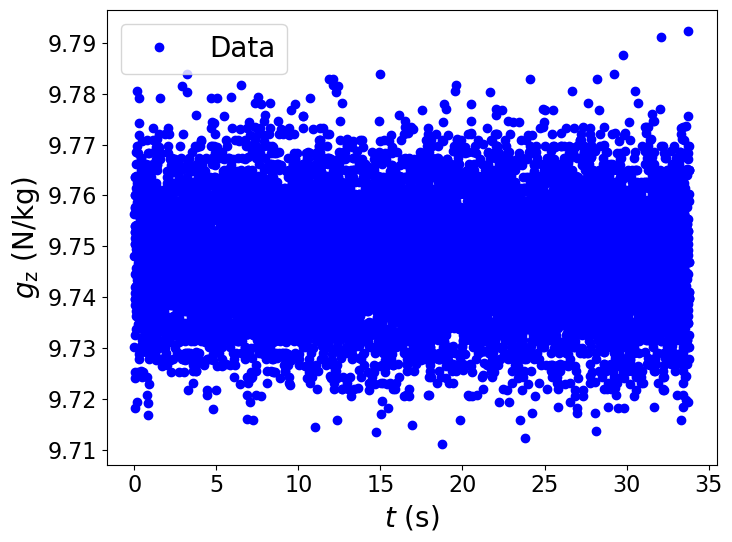

In [5]:
cm = 0.393701

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(20*cm, 15*cm))
ax1 = fig.add_subplot(1, 1, 1)

# Plot data
ax1.plot(t, gz, 'bo', label='Data')

# Labels and legend
ax1.set_xlabel(r'$t$ (s)', fontsize=20)
ax1.set_ylabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.legend(fontsize=20)
plt.show()

## Discretize data by sorting it into bins

In [6]:
# Number of bins and bin size

gz_max = np.max(gz)
gz_min = np.min(gz)


bin_size = 0.01
#bin_size = 0.005
#bin_size = 0.002

n_bins = int((gz_max - gz_min) / bin_size) + 1

bins = np.linspace(gz_min, gz_min+bin_size*(n_bins-1), n_bins)

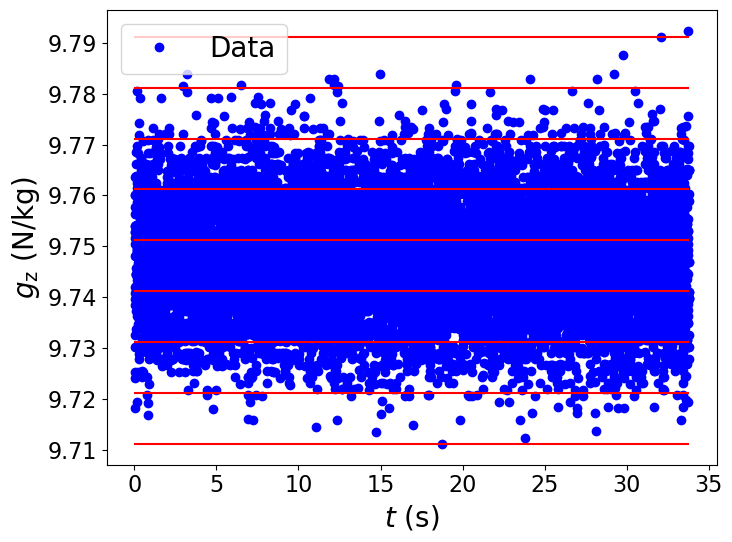

In [7]:
cm = 0.393701

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(20*cm, 15*cm))
ax1 = fig.add_subplot(1, 1, 1)

# Plot data
ax1.plot(t, gz, 'bo', label='Data', zorder = 1)
for b in bins:
    ax1.hlines(b, 0, t[-1], 'r', zorder = 2)

# Labels and legend
ax1.set_xlabel(r'$t$ (s)', fontsize=20)
ax1.set_ylabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.legend(fontsize=20)
plt.show()

In [8]:
# Initialize array holding number of data  points (occurrence) per bin
occurrence = np.zeros(n_bins)

# Calculate the offset of the occurrence-array index with respect to the floor division of the data
offset = np.min(bins)//bin_size + 1

# Iterate through all data and find the index of the occurrence-array into which the data falls.
# Then increment this array value by one. 
for gz_i in gz:
    index = int(gz_i//bin_size-offset)
    occurrence[index] = occurrence[index] + 1

In [9]:
# Initialize array holding number of data  points (occurrence) per bin
occurrence = np.zeros(n_bins)

# Calculate the offset of the occurrence-array index with respect to the floor division of the data
offset = np.min(bins)

# Iterate through all data and find the index of the occurrence-array into which the data falls.
# Then increment this array value by one. 
for gz_i in gz:
    index = int((gz_i - offset)//bin_size)
    occurrence[index] = occurrence[index] + 1

## Plot Histogram

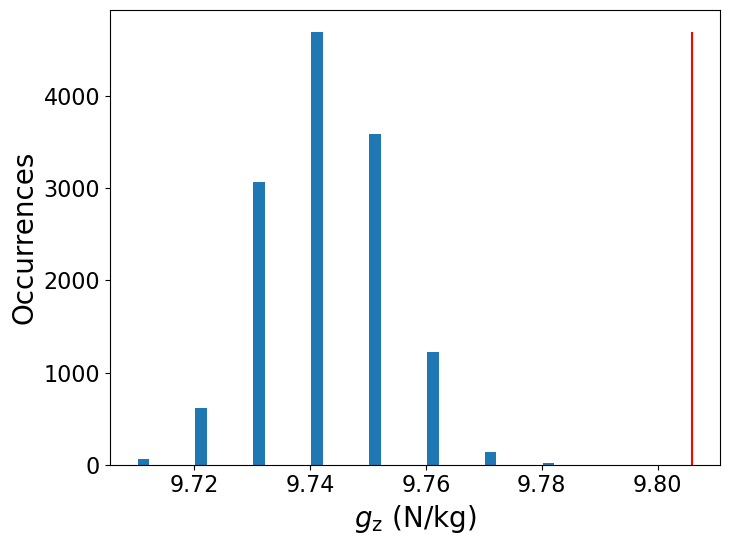

In [10]:
cm = 0.393701

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(20*cm, 15*cm))
ax1 = fig.add_subplot(1, 1, 1)

# Plot data
ax1.bar(bins, occurrence, width = bin_size/5)
ax1.vlines(g_theo, 0, np.max(occurrence), 'r')

# Labels and legend
ax1.set_xlabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.set_ylabel('Occurrences', fontsize=20)
plt.show()

## Calculate Mean and Variance

In [11]:
mean = np.sum(gz)/n
var = np.sum((gz-mean)**2)/(n-1)

In [12]:
print('Mean : {:0.2f} N/kg, Standard deviation : {:0.2f} N/kg'.format(mean, np.sqrt(var)))

Mean : 9.75 N/kg, Standard deviation : 0.01 N/kg


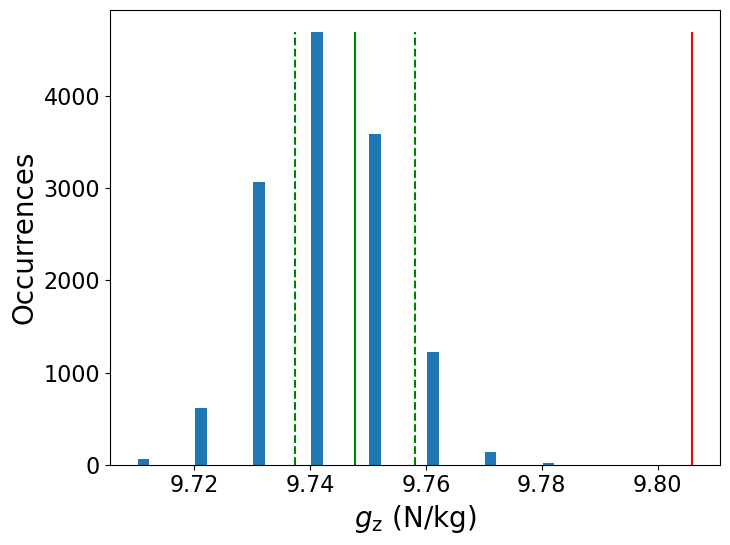

In [13]:
cm = 0.393701

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(20*cm, 15*cm))
ax1 = fig.add_subplot(1, 1, 1)

# Plot data
ax1.bar(bins, occurrence, width = bin_size/5)
ax1.vlines(g_theo, 0, np.max(occurrence), 'r')
ax1.vlines(mean, 0, np.max(occurrence), 'g')
ax1.vlines(mean + np.sqrt(var), 0, np.max(occurrence), 'g', linestyles='dashed')
ax1.vlines(mean - np.sqrt(var), 0, np.max(occurrence), 'g', linestyles='dashed')

# Labels and legend
ax1.set_xlabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.set_ylabel('Occurrences', fontsize=20)
plt.show()

We have only one Datapoint within our 1-$\sigma$-interval. We should increase the number of bins, and decrease the bin size accordingly.

<b>Question:</b> Are the data points normally distributed?

In [14]:
# Calculate the fraction of the data point within a certain interval around the mean.

# Sum of the data points in the interval
n_sigma = 0
# Width of the interval in terms of the standard deviation
width = 1
# iterate through all bins and sum their values if they lie in the specified interval
i = 0
for b in bins:
    if (b >= (mean - np.sqrt(var) * width)) and (b <= (mean + np.sqrt(var) * width)):
        n_sigma = n_sigma + occurrence[i]
    i = i + 1
    
print('Occurences within the {:d}-sigma-interval: {:0.1f}%'.format(width,n_sigma/n*100))

Occurences within the 1-sigma-interval: 61.9%


## Probability Distribution

In [15]:
# Probability normalization factor (the favorable over the possible)
A = n

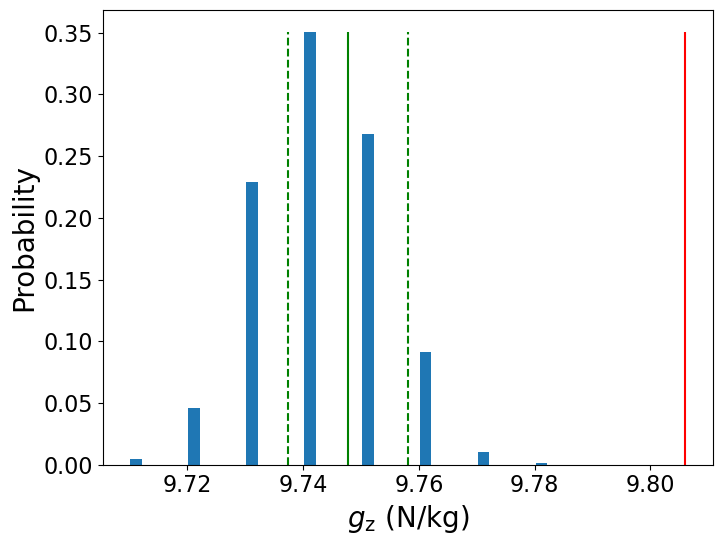

In [16]:
cm = 0.393701

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(20*cm, 15*cm))
ax1 = fig.add_subplot(1, 1, 1)

# Plot data
ax1.bar(bins, occurrence/A, width = bin_size/5)
ax1.vlines(g_theo, 0, np.max(occurrence/A), 'r')
ax1.vlines(mean, 0, np.max(occurrence/A), 'g')
ax1.vlines(mean + np.sqrt(var), 0, np.max(occurrence/A), 'g', linestyles='dashed')
ax1.vlines(mean - np.sqrt(var), 0, np.max(occurrence/A), 'g', linestyles='dashed')

# Labels and legend
ax1.set_xlabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.set_ylabel('Probability', fontsize=20)
plt.show()

## Deviation from Theory Value

In [ ]:
d = (g_theo - mean) / np.sqrt(var)

In [ ]:
print('Deviation of the mean from the theory value: {:0.1f} sigma'.format(d))